# House Price Prediction with a regression model using regularisation

## 1. Data Understanding

- Have a look at the dataset and understand the size, attribute names etc.

In [1]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
houses = pd.read_csv("/Users/jiajinggu/Desktop/Upgrad/Courses/C4M2/Assignment/train.csv")

In [3]:
# summary of the dataset: 1460 rows, 81 columns, some columns have null values
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
pd.set_option('display.max_columns', None)  # Show all columns without truncation
houses.head()  # head

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Data Cleaning
### 2.1. Delete unnessecary columns
- No business meaning columns: 'Id'
- Columns have more than 20% null values should be considered whether to delete or not: 'Alley', 'PoolQC', 'Fence', 'MiscFeature'.
- 'Alley' with NA has business meaning as 'No alley access', so it should be kept.
- 'PoolQC' with NA has business meaning as 'No Pool', so it should be kept.
- 'Fence' with NA has business meaning as 'No Fence', so it should be kept.


In the end, we delete 2 columns 'Id' and 'MiscFeature'.

In [5]:
# dropping 'Id' and 'MiscFeature' 
houses_dropped = houses.drop(['Id','MiscFeature'], axis=1)
houses_dropped.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


### 2.2. Data transfer

In [6]:
#Transfer the house building year to house age
houses_dropped['age'] = (houses_dropped['YrSold'] - houses_dropped['YearBuilt'])
houses_dropped.drop(axis=1,labels=["YrSold", "YearBuilt", "MoSold", "YearRemodAdd"],inplace=True)
houses_dropped.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,age
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,0,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,0,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,0,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,0,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,0,WD,Normal,250000,8


### 2.3. Checking for Missing Values and imputing them

#### 2.3.1.  Imputing the "NA" Categorical variables with "None"

Categorical variables are:
'Alley','MasVnrType','PoolQC','Fence', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish', 'GarageQual','GarageCond'

In [7]:
# List of all the categorical variables
cat_varlist = houses_dropped[['Alley','MasVnrType','PoolQC','Fence', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish', 'GarageQual','GarageCond']]

In [8]:
# Fill missing values with 'None' for each column
for col in cat_varlist:
    houses_dropped[col].fillna('None', inplace=True)

In [9]:
houses_dropped.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,age
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,0,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,0,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,0,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,0,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,0,WD,Normal,250000,8


#### 2.3.2.  Imputing them Numerical variables

- 'LotFrontage' imputes with mean.

In [10]:
# Impute using mean
mean_value = houses_dropped['LotFrontage'].mean()
houses_dropped['LotFrontage'].fillna(mean_value, inplace=True)

- 'MasVnrArea' imputes with value 0.

In [11]:
houses_dropped['MasVnrArea'].fillna(0, inplace=True)

In [12]:
print(houses_dropped.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  RoofStyl

## 3. Data Exploration

### 3.1. Observe the distribution of target variable

<Axes: xlabel='SalePrice', ylabel='Density'>

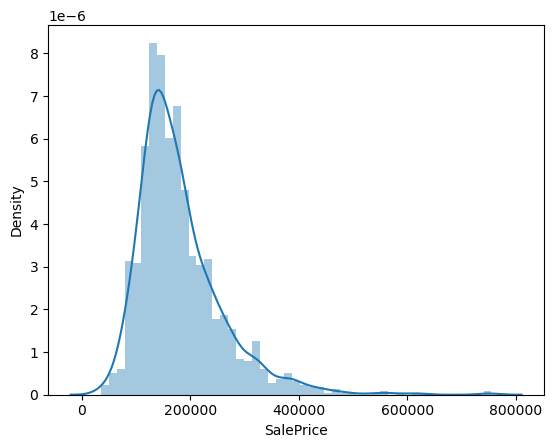

In [13]:
sns.distplot(houses_dropped['SalePrice'])

Sale price is skewed left side.Use log for normal distribution.

<Axes: xlabel='SalePrice_log', ylabel='Density'>

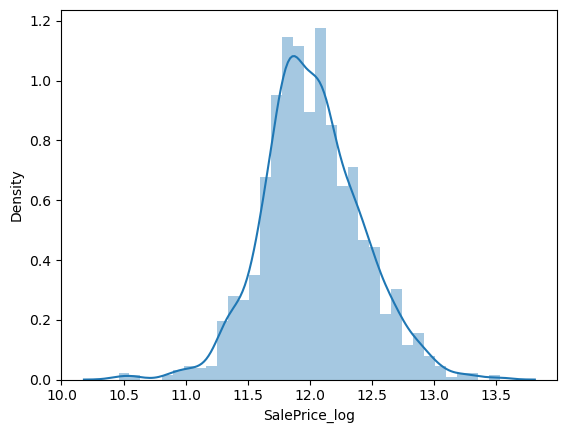

In [14]:
houses_dropped['SalePrice_log']=np.log1p(houses_dropped['SalePrice'])
sns.distplot(houses_dropped['SalePrice_log'])

### 3.2. Checking the relation between numerical variables by pairs

#### 3.2.1. List all the numerical varibles

In [15]:
# Use pairplot to visualize pairwise relationships
houses_numeric = houses_dropped.select_dtypes(include=['float64', 'int64'])
houses_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,age,SalePrice_log
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,5,12.247699
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,31,12.109016
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,7,12.317171
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,91,11.849405
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,8,12.429220


In [16]:
#'MSSubClass', 'OverallQual', 'OverallCond'are categorical variables, so drop them
# The feature of 'SalePrice' is described in 'SalePrice_log', so drop SalePrice'
houses_numeric = houses_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond','SalePrice'], axis=1)
houses_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,age,SalePrice_log
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,5,12.247699
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,31,12.109016
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,7,12.317171
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,91,11.849405
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,8,12.429220


#### 3.2.2. Correlation heatmap of numarical variables

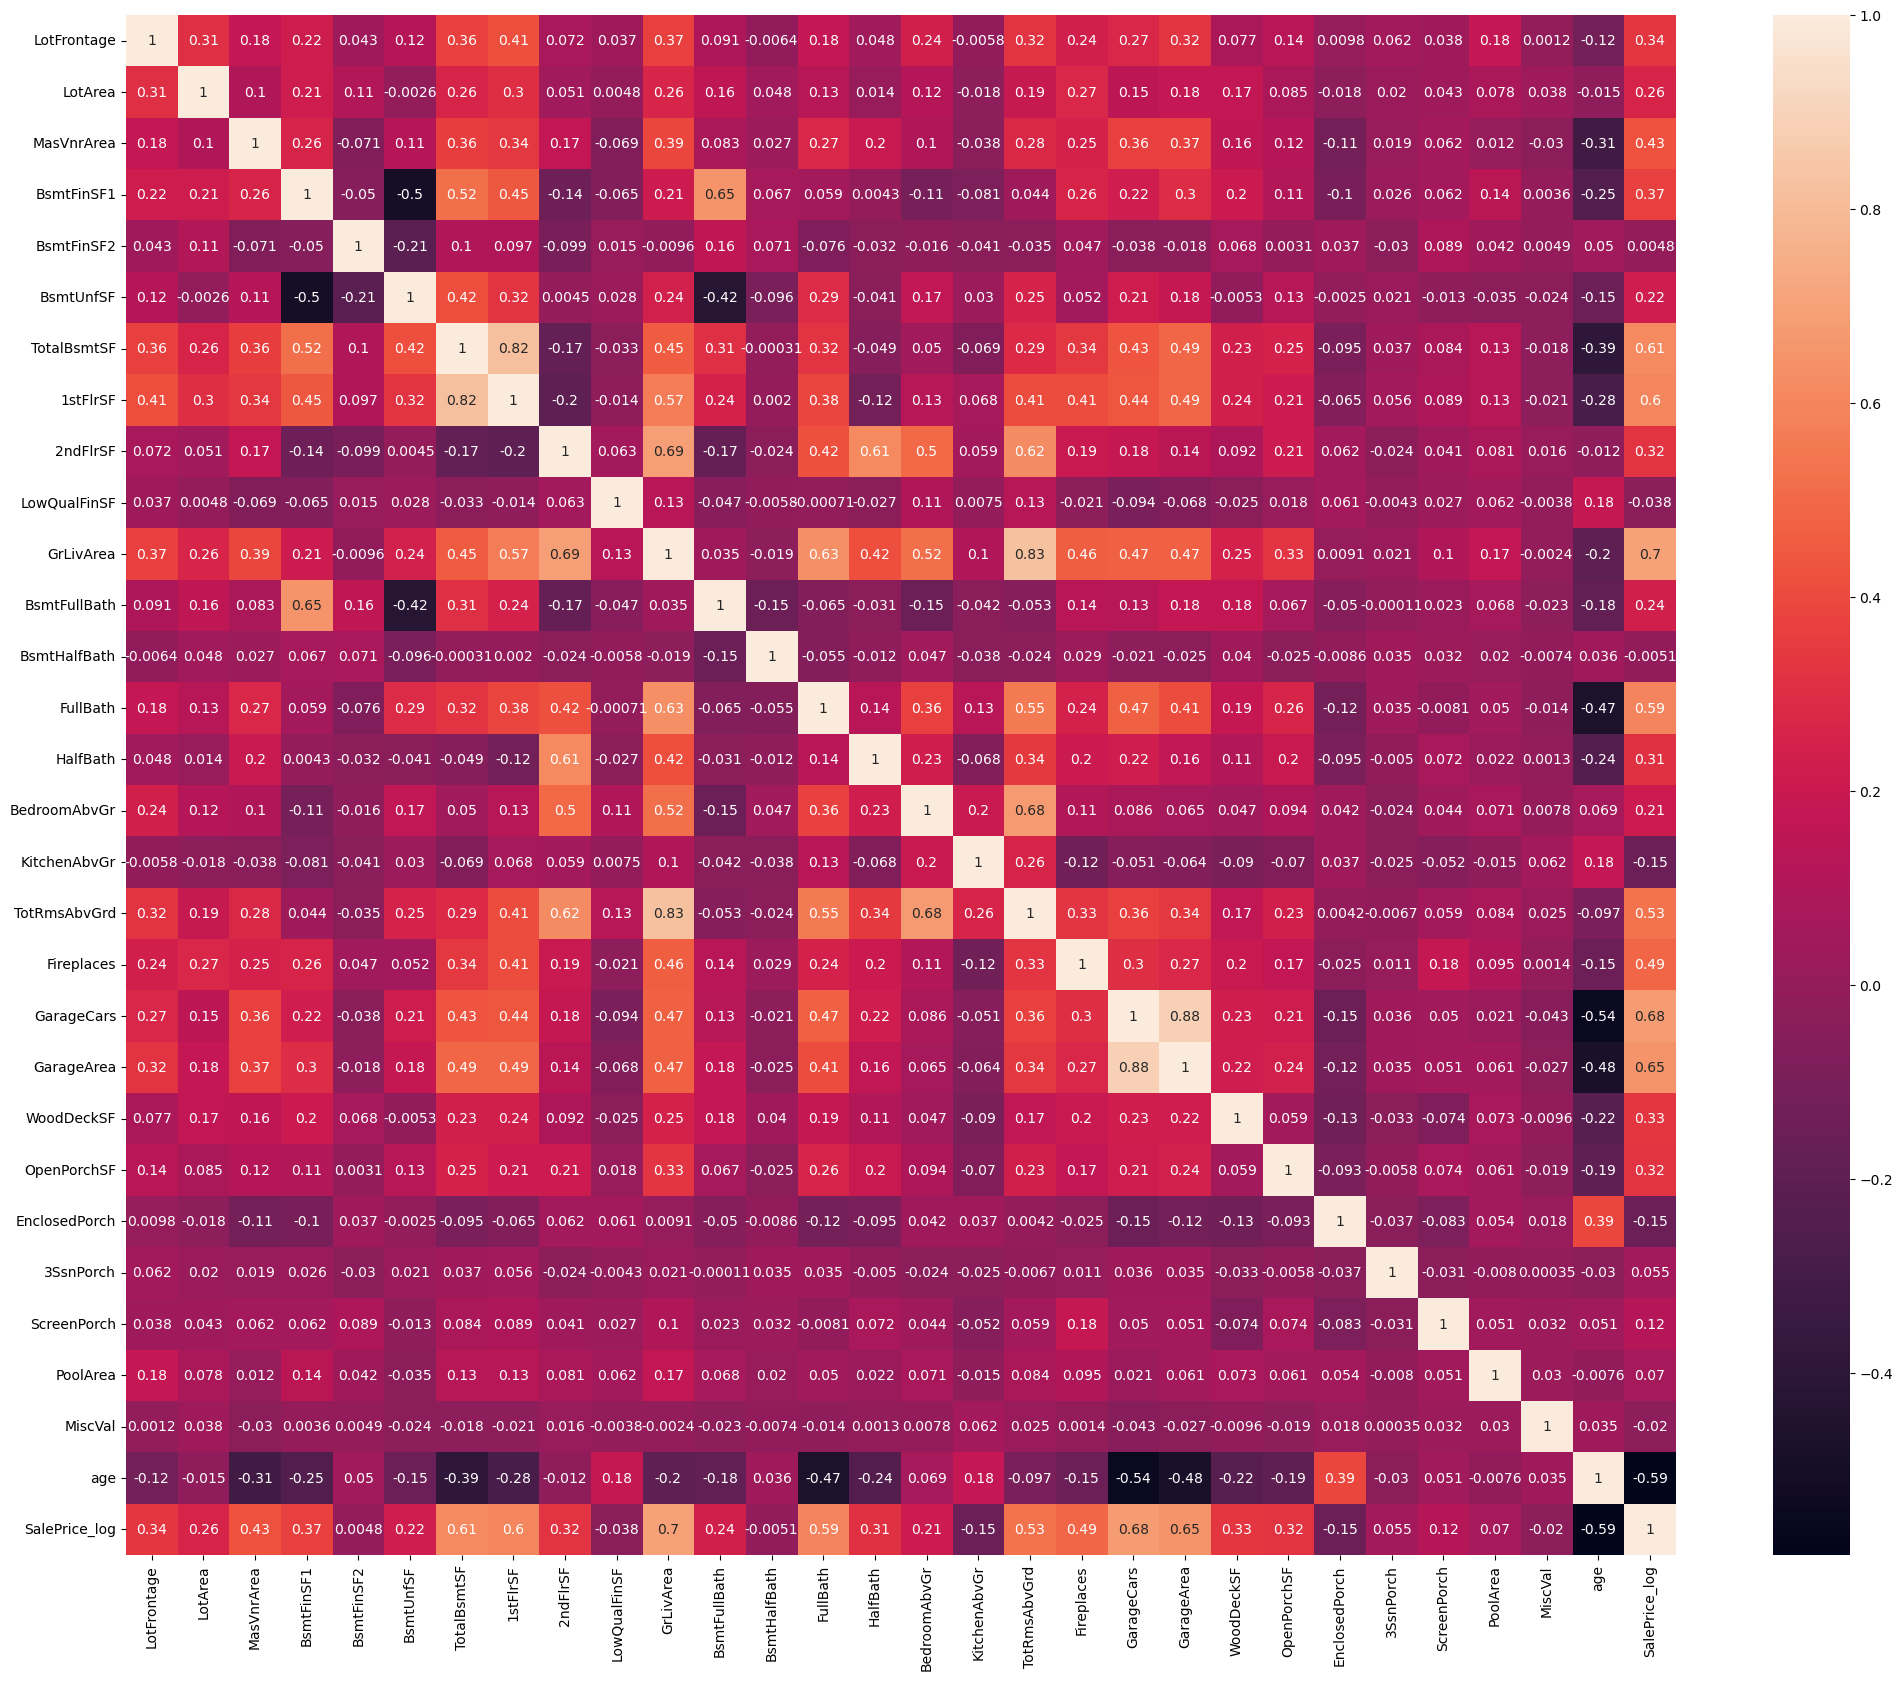

In [17]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,20))        # Size of the figure
sns.heatmap(houses_numeric.corr(),annot = True)
plt.show()

#### 3.2.3. Visualize the numerical variables by pair plot to get more insight

Check the pair plot of highly related varibles: Corrlation > 0.6 or < -0.6

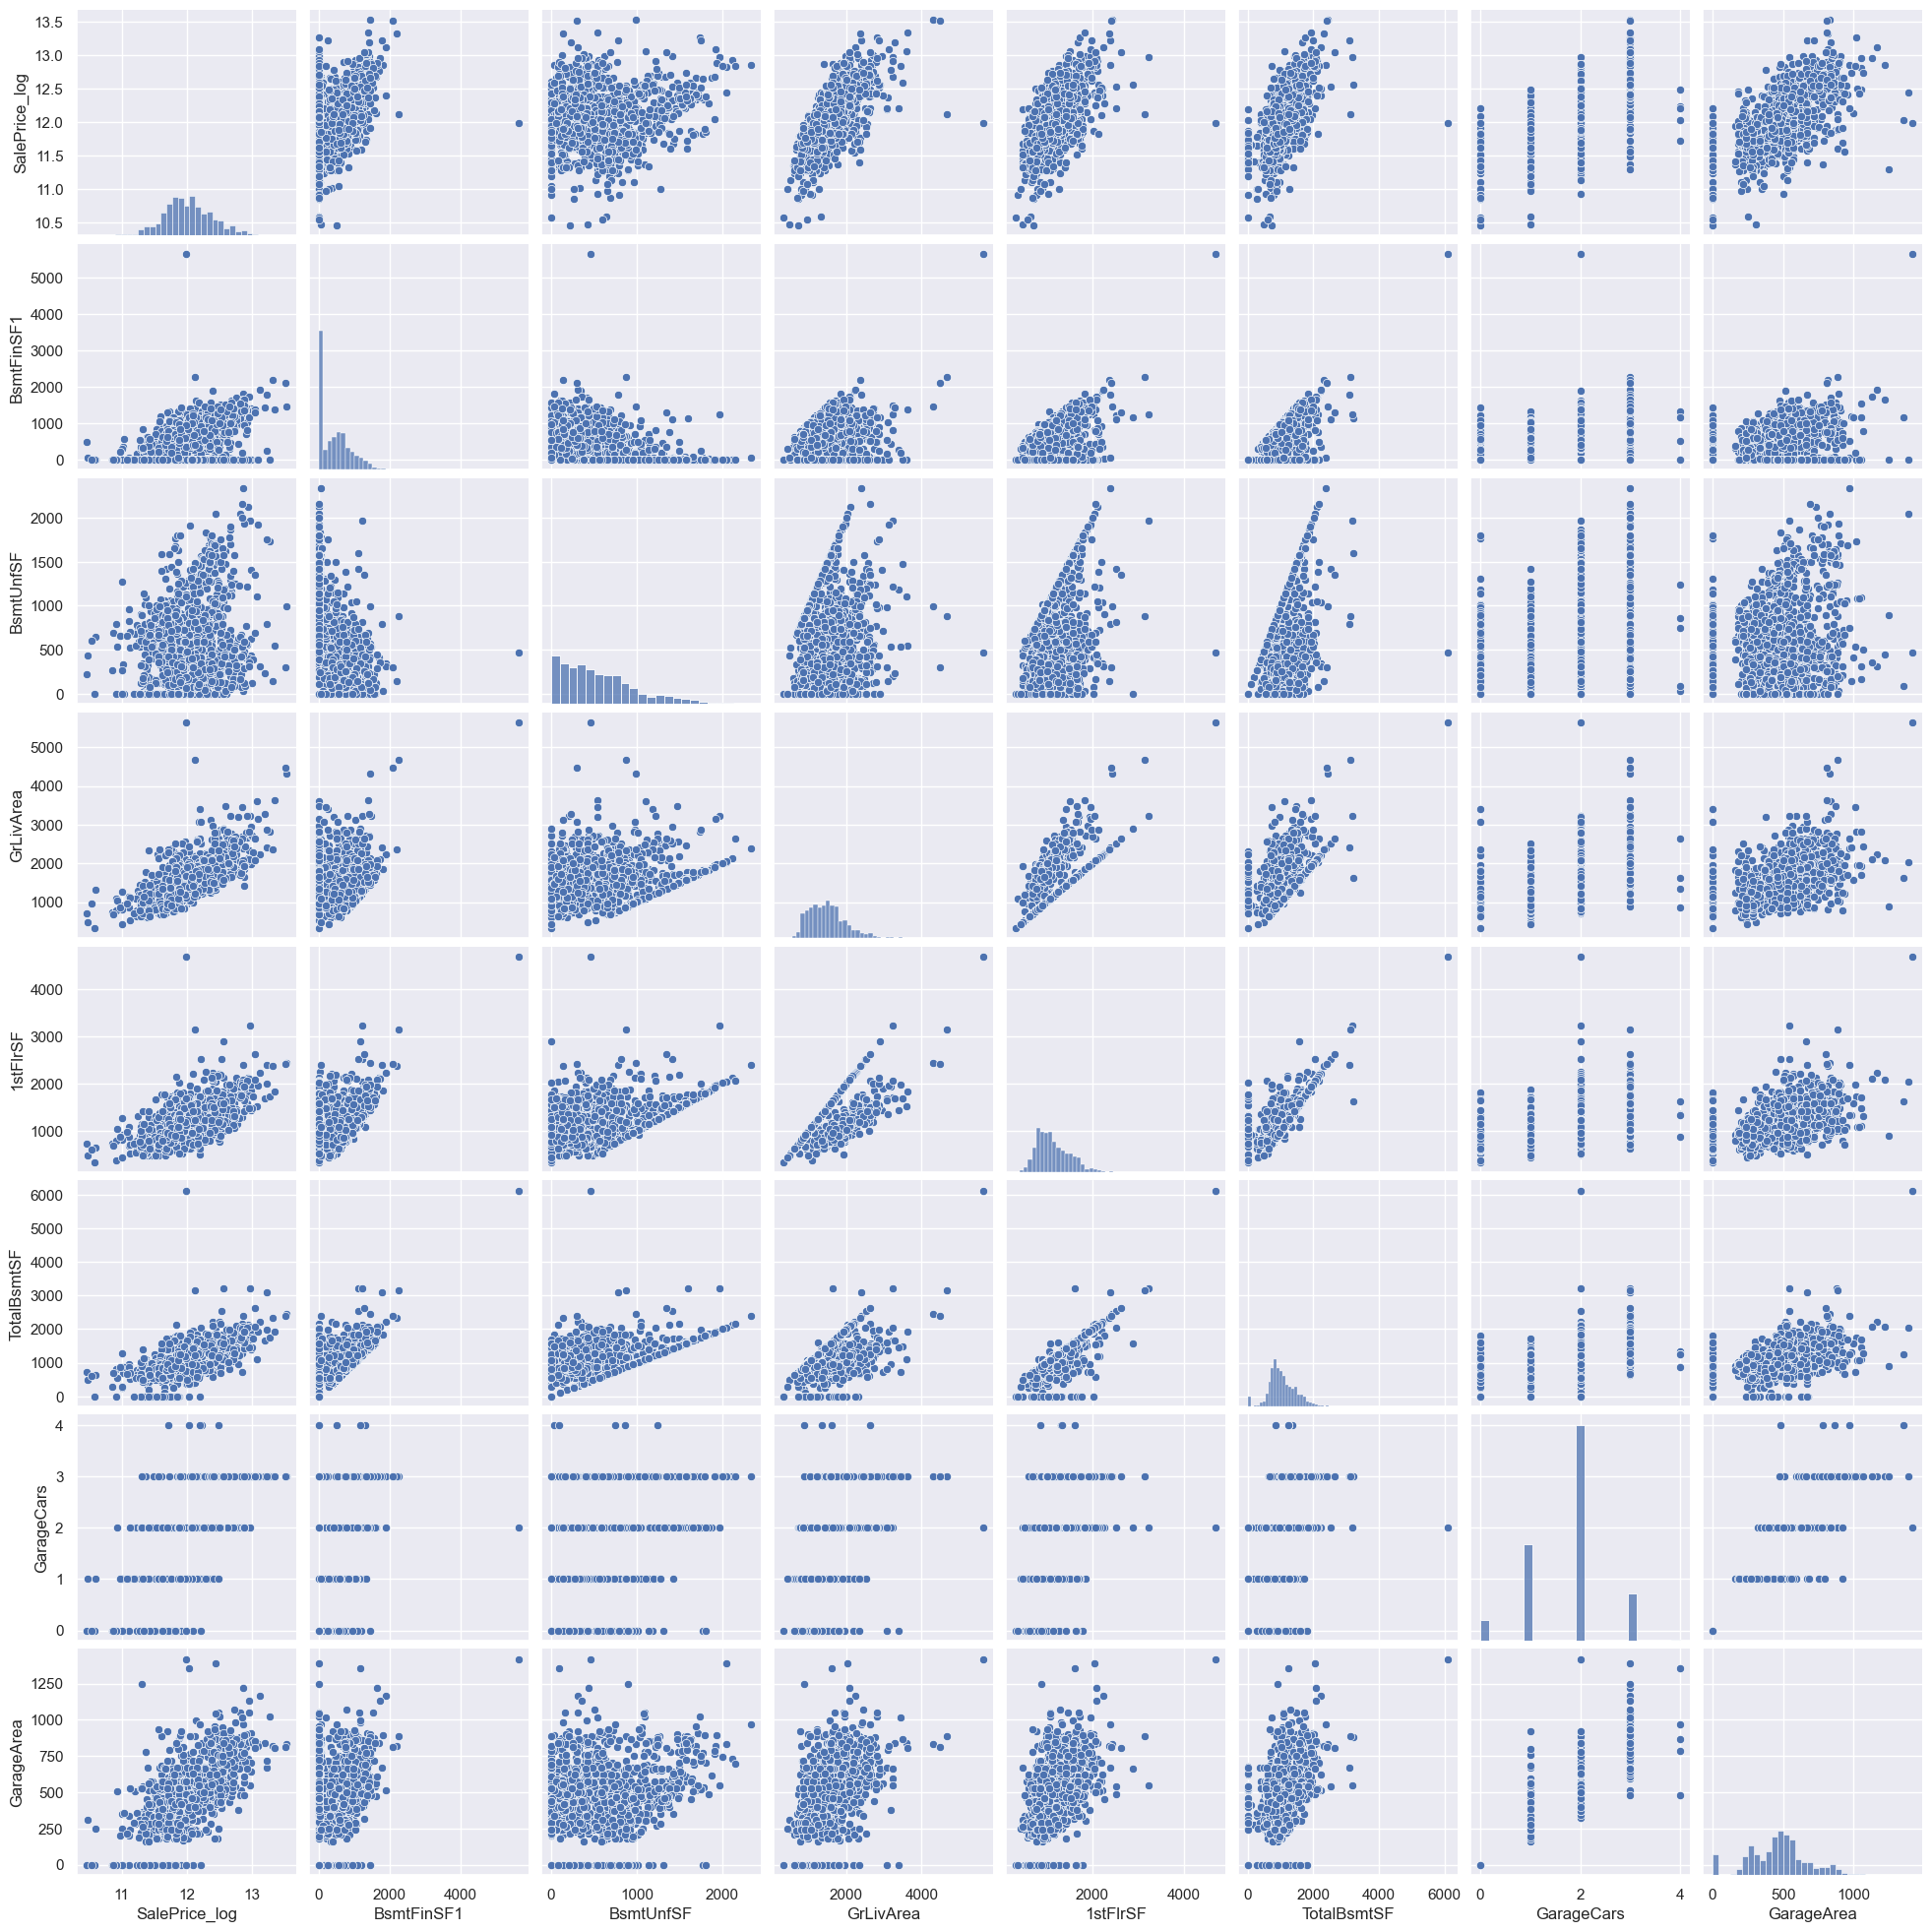

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

pairplot_columns = ['SalePrice_log', 'BsmtFinSF1', 'BsmtUnfSF', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea']

sns.pairplot(houses_numeric[pairplot_columns], size=2.5)
plt.show()


Drop columns which are highly correlated and not having good pridiction strength

In [19]:
print(houses_dropped.shape)

(1460, 77)


In [20]:
columns_to_be_dropped = ['GarageCars','BsmtUnfSF','SalePrice']
houses_dropped.drop(axis=1,labels=columns_to_be_dropped,inplace=True)

In [21]:
houses_dropped.shape

(1460, 74)

In [22]:
print(houses_numeric.shape)
# preparation for next usage of numerical variables
houses_numeric.drop(['GarageCars', 'BsmtUnfSF'], axis=1, inplace=True)
print(houses_numeric.shape)

(1460, 30)
(1460, 28)


In [23]:
# store the numerical varibles into a list
num_list = houses_numeric.columns.tolist()
print(num_list)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'age', 'SalePrice_log']


#### 3.2.4. Scaling the numerical variables

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

houses_dropped[num_list] = scaler.fit_transform(houses_dropped[num_list])
houses_dropped.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,age,SalePrice_log
0,60,RL,-0.229372,-0.207142,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.514104,Gd,TA,PConc,Gd,TA,No,GLQ,0.575425,Unf,-0.288653,-0.459303,GasA,Ex,Y,SBrkr,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,Gd,0.912210,Typ,-0.951226,None,Attchd,2003.0,RFn,0.351000,TA,TA,Y,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,None,None,-0.087688,WD,Normal,-1.043259,0.560067
1,20,RL,0.451936,-0.091886,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,-0.570750,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.171992,Unf,-0.288653,0.466465,GasA,Ex,Y,SBrkr,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,TA,-0.318683,Typ,0.600495,TA,Attchd,1976.0,RFn,-0.060731,TA,TA,Y,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,None,None,-0.087688,WD,Normal,-0.183465,0.212763
2,60,RL,-0.093110,0.073480,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.325915,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.092907,Unf,-0.288653,-0.313369,GasA,Ex,Y,SBrkr,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,Gd,-0.318683,Typ,0.600495,TA,Attchd,2001.0,RFn,0.631726,TA,TA,Y,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,None,None,-0.087688,WD,Normal,-0.977121,0.734046
3,70,RL,-0.456474,-0.096897,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.570750,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.499274,Unf,-0.288653,-0.687324,GasA,Gd,Y,SBrkr,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,Gd,0.296763,Typ,0.600495,Gd,Detchd,1998.0,Unf,0.790804,TA,TA,Y,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,None,None,-0.087688,WD,Abnorml,1.800676,-0.437383
4,60,RL,0.633618,0.375148,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.366489,Gd,TA,PConc,Gd,TA,Av,GLQ,0.463568,Unf,-0.288653,0.199680,GasA,Ex,Y,SBrkr,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,Gd,1.527656,Typ,0.600495,TA,Attchd,2000.0,RFn,1.698485,TA,TA,Y,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,None,None,-0.087688,WD,Normal,-0.944052,1.014651


## 4. Data Preparation 


### 4.1. Converting binary variables to 0/1

In [25]:
# Define the binary_map function
def binary_map_1(x):
    return x.map({'Y': 1, 'N': 0})

# Applying the function to the 'CentralAir' column
houses_dropped['CentralAir'] = binary_map_1(houses_dropped['CentralAir'])

In [26]:
# Define the binary_map function
def binary_map_2(x):
    return x.map({'Grvl': 1, 'Pave': 0})

# Applying the function to the 'CentralAir' column
houses_dropped['Street'] = binary_map_2(houses_dropped['Street'])

In [27]:
print(houses_dropped.shape)

(1460, 74)


### 4.2. Create dummy features for categorical variables with multiple levels

In [28]:
# change the int columns in to string before adding dummy variables
columns_to_convert = ['MSSubClass', 'OverallQual', 'OverallCond']
houses_dropped[columns_to_convert] = houses_dropped[columns_to_convert].astype(str)

In [29]:
houses_dropped = pd.get_dummies(houses_dropped, drop_first=True )
print(houses_dropped.shape)
houses_dropped.head()

(1460, 376)


,LotFrontage,LotArea,Street,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,age,SalePrice_log,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBl

### 4.3. Splitting the Data into Training and Testing Sets

#### 4.3.1. Performing a train-test split

In [30]:
y = houses_dropped['SalePrice_log']
X = houses_dropped.drop(['SalePrice_log'], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

## 4. Model Building and Evaluation

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso

### 4.1. Linear regression and evaluation

#### 4.1.1. Feature Selection Using RFE

In [33]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=35)
rfe = rfe.fit(X_train, y_train)

In [34]:
col = X_train.columns[rfe.support_]
print(col)

Index(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Condition2_PosN',
       'OverallQual_10', 'OverallQual_2', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_9', 'OverallCond_2', 'OverallCond_3', 'OverallCond_5',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'BsmtQual_None',
       'BsmtCond_Po', 'Functional_Sev', 'GarageQual_Fa', 'GarageCond_None',
       'PoolQC_Gd'],
      dtype='object')


#### 4.1.2. Build Linear regression model

In [35]:
X_train_rfe = X_train[col]
print(X_train_rfe.shape)

(1021, 35)


In [36]:
#Fitting the linear model
import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe) 
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [37]:
from sklearn.metrics import r2_score

#get the training dataset r2_score
y_train_pred = lm.predict(X_train_rfe)
r2_train = r2_score(y_train, y_train_pred)
print("r2_score in training dataset is " + str(r2_train))

r2_score in training dataset is 0.8570595862952035


#### 4.1.3. Model evaluation

In [38]:
#get residule distribution
y_train_pred = lm.predict(X_train_rfe)
residual = y_train-y_train_pred

Text(0.5, 0, 'Errors')

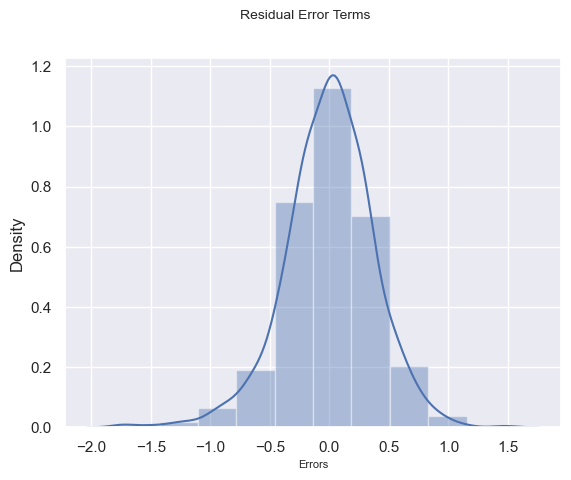

In [39]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residual), bins = 10)
fig.suptitle('Residual Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 8) 

The distribution seems to follow normal distribution.

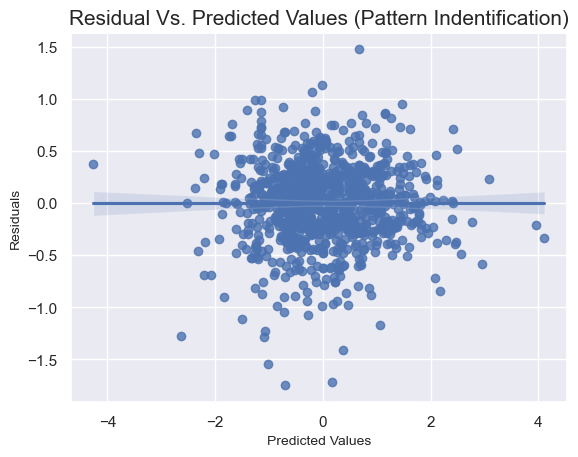

In [40]:
#check the residual pattern
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 15})
plt.xlabel('Predicted Values', fontdict={'fontsize': 10})
plt.ylabel('Residuals', fontdict={'fontsize': 10})
plt.show()

#### 4.1.4. Test

In [41]:
X_test_rfe = X_test[col]
print(X_test_rfe.shape)
X_test_rfe = sm.add_constant(X_test_rfe)

(438, 35)


In [42]:
#get the test dataset r2_score
y_test_pred = lm.predict(X_test_rfe)
r2_train = r2_score(y_test, y_test_pred)
print("r2_score in testing dataset is " + str(r2_train))

r2_score in testing dataset is 0.6313111122104931


It seems that the Linear regression model has overfitting problem.

### 4.2. Ridge regression and evaluation

#### 4.2.1. GridSearchCV to find the best hyperparameters

In [43]:
# alpha values
params = {
    'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,
             2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
             20.0,50.0,100.0,500.0,1000.0]
}

In [44]:
ridge = Ridge()

# cross validation to find the best hyperparameters
folds = 5
ridge_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 10.0}
-0.2300776516006348


#### 4.2.2. Build Ridge regression model

In [46]:
ridge = Ridge(alpha=10)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.05044132e-02,  4.45495970e-02, -6.63974585e-02, -6.48532198e-04,
       -2.14115161e-02,  1.65908993e-02,  2.43885354e-02,  1.78905707e-01,
        9.15286807e-02,  1.32221842e-01, -2.56708563e-03,  1.76938365e-01,
        6.19488796e-02,  1.19126462e-02,  7.11539667e-02,  3.18370247e-02,
        9.55343841e-03, -5.53169638e-02,  4.60537873e-02,  2.45166719e-02,
        7.90651420e-02,  3.32463163e-02,  2.03383649e-04,  1.79922657e-02,
        1.82483097e-02,  3.08733506e-02, -4.16551685e-02, -2.17926615e-04,
       -1.37188144e-01, -1.51063279e-01, -8.31364198e-02, -7.73768463e-03,
        1.04873108e-01, -1.24890284e-01, -2.57519374e-02,  1.07631388e-02,
        1.62504243e-02, -8.38430366e-02,  1.32858148e-01,  9.50411504e-02,
        1.42499565e-02,  3.30787655e-02,  6.02529828e-02,  1.09211472e-01,
        1.07266615e-01,  1.68200632e-01,  6.21430889e-02, -1.06485703e-02,
        9.02324329e-02,  6.38984630e-02, -7.86809020e-02,  3.15273872e-02,
        9.02501448e-02,  

In [47]:
y_train_pred_ridge = ridge.predict(X_train)
print("r2_score in training dataset is",metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge))

r2_score in training dataset is 0.9280456318685023


In [48]:
y_test_pred_ridge = ridge.predict(X_test)
print("r2_score in testing dataset is",metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

r2_score in testing dataset is 0.8741041586952022


#### 4.2.3. Check coeffcient values

In [49]:
ridge_para = list(ridge.coef_)
ridge_para.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coeff = pd.DataFrame(list(zip(cols,ridge_para)))
ridge_coeff.columns = ['Feature','Coeff']

In [50]:
ridge_coeff.sort_values(by='Coeff',ascending=False).head(15)

,Feature,Coeff
121,OverallCond_2,0.323981
68,Neighborhood_Edwards,0.234719
78,Neighborhood_OldTown,0.211106
120,OverallQual_9,0.192754
129,RoofStyle_Gable,0.183495
8,1stFlrSF,0.178906
12,BsmtFullBath,0.176938
46,MSZoning_RM,0.168201
83,Neighborhood_StoneBr,0.164428
128,OverallCond_9,0.147830


#### 4.2.4. Check the assumptions of linear regression

Text(0.5, 0, 'Errors')

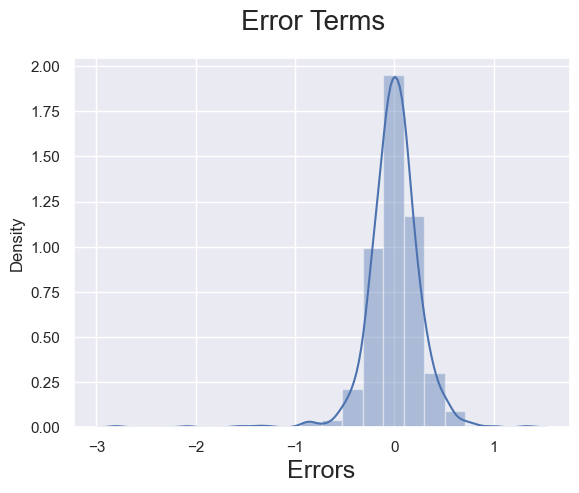

In [51]:
fig = plt.figure()
res=y_train - y_train_pred_ridge
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

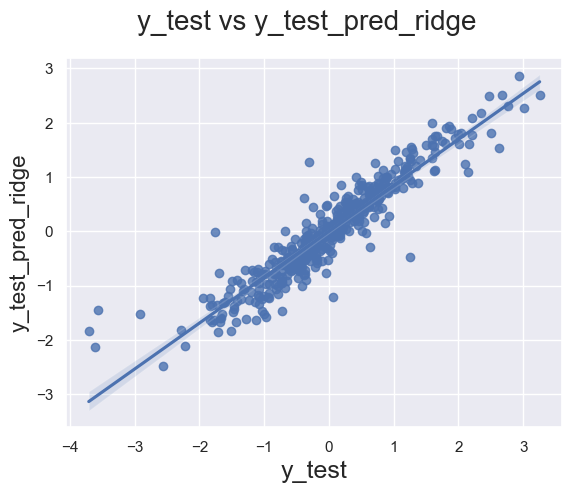

In [52]:
fig = plt.figure()
sns.regplot(x=(y_test),y=y_test_pred_ridge)
fig.suptitle('y_test vs y_test_pred_ridge', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred_ridge', fontsize=16)
plt.show()

### 4.3. Lasso regression and evaluation|

#### 4.3.1. GridSearchCV to find the best hyperparameters

In [53]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,
             2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
             20.0,50.0,100.0,500.0,1000.0]}
lasso = Lasso()

# cross validation
folds = 5
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20.0, 50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.20925924121187936


#### 4.3.2. Build Lasso regression model

In [55]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

y_train_pred_lasso = lasso.predict(X_train)
print("r2_score on train data: ", metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso))

y_test_pred_lasso = lasso.predict(X_test)
print("r2_score on test data:", metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

r2_score on train data:  0.9465767883878152
r2_score on test data: 0.7362516184339558


#### 4.3.3. Check coeffcient values

In [56]:
lasso_parameter = list(lasso.coef_)
lasso_parameter.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coeff = pd.DataFrame(list(zip(cols,lasso_parameter)))
lasso_coeff.columns = ['Feature','Coeff']

In [57]:
lasso_coeff.sort_values(by='Coeff',ascending=False).head(15)

,Feature,Coeff
121,OverallCond_2,0.497116
12,BsmtFullBath,0.334736
129,RoofStyle_Gable,0.307779
68,Neighborhood_Edwards,0.292590
120,OverallQual_9,0.259716
113,OverallQual_2,0.240194
83,Neighborhood_StoneBr,0.181546
144,Exterior1st_CBlock,0.164758
66,Neighborhood_CollgCr,0.164248
194,BsmtExposure_Mn,0.161437


#### 4.3.4. Check the assumptions of linear regression

Text(0.5, 0, 'Errors')

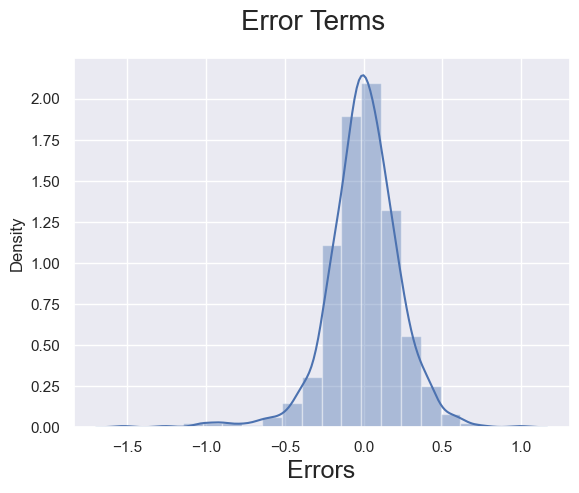

In [58]:
fig = plt.figure()
res=y_train - y_train_pred_lasso
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

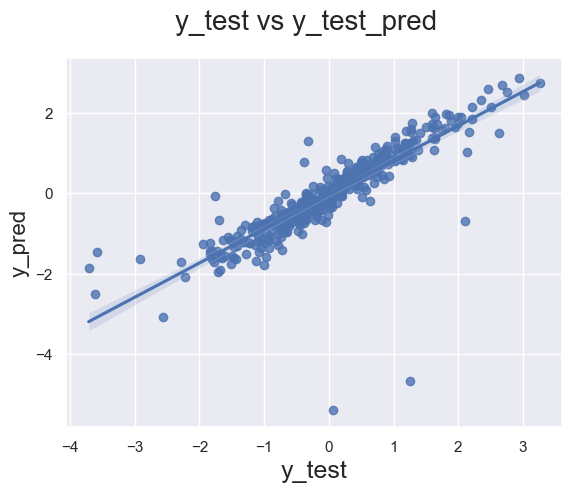

In [59]:
fig = plt.figure()
sns.regplot(x=(y_test),y=y_test_pred_lasso)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## 5. Questions and Answers

### 5.1. Double alpha value

In [60]:
# double alpha for ridge
ridge_double = Ridge(alpha = 20)
ridge_double.fit(X_train,y_train)

y_pred_train_ridge_double = ridge_double.predict(X_train)
print("r2_score on train data using Ridge regression:",r2_score(y_train,y_pred_train_ridge_double))

y_pred_test_ridge_double = ridge.predict(X_test)
print("r2_score on test data using Ridge regression:",r2_score(y_test,y_pred_test_ridge_double))

r2_score on train data using Ridge regression: 0.9179608572946468
r2_score on test data using Ridge regression: 0.8741041586952022


In [61]:
ridge_para_double = list(ridge_double.coef_)
ridge_para_double.insert(0,ridge_double.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coeff_double = pd.DataFrame(list(zip(cols,ridge_para_double)))
ridge_coeff_double.columns = ['Feature','Coeff']
ridge_coeff_double.sort_values(by='Coeff',ascending=False).head(10)

,Feature,Coeff
121,OverallCond_2,0.251700
68,Neighborhood_Edwards,0.187100
78,Neighborhood_OldTown,0.176119
120,OverallQual_9,0.170500
12,BsmtFullBath,0.169240
8,1stFlrSF,0.159656
194,BsmtExposure_Mn,0.132519
83,Neighborhood_StoneBr,0.130045
128,OverallCond_9,0.125336
10,LowQualFinSF,0.123653


In [62]:
# double alpha for lasso
lasso_double = Lasso(alpha=0.002)

lasso_double.fit(X_train, y_train)

y_train_pred_lasso_double = lasso_double.predict(X_train)
print("r2_score on train data: ", metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso_double))

y_test_pred_lasso_double = lasso_double.predict(X_test)
print("r2_score on test data:", metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso_double))

r2_score on train data:  0.927777313746695
r2_score on test data: 0.8158146567445264


In [63]:
lasso_parameter_double = list(lasso_double.coef_)
lasso_parameter_double.insert(0,lasso_double.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coeff_double = pd.DataFrame(list(zip(cols,lasso_parameter_double)))
lasso_coeff_double.columns = ['Feature','Coeff']
lasso_coeff_double.sort_values(by='Coeff',ascending=False).head(15)

,Feature,Coeff
121,OverallCond_2,0.487973
12,BsmtFullBath,0.329861
68,Neighborhood_Edwards,0.272055
120,OverallQual_9,0.260247
83,Neighborhood_StoneBr,0.214038
8,1stFlrSF,0.174360
129,RoofStyle_Gable,0.170448
194,BsmtExposure_Mn,0.166436
78,Neighborhood_OldTown,0.164049
144,Exterior1st_CBlock,0.138293


### 5.2. Exclusive the top 5 important varibles of Lasso Regression

In [64]:
Lasso_sort=lasso_coeff.sort_values(by='Coeff',ascending=False).head(5)
Lasso_sort

,Feature,Coeff
121,OverallCond_2,0.497116
12,BsmtFullBath,0.334736
129,RoofStyle_Gable,0.307779
68,Neighborhood_Edwards,0.292590
120,OverallQual_9,0.259716


In [65]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'Street', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=375)

In [66]:
# drop the top five features
columns_to_be_dropped = ['OverallCond_2','BsmtFullBath',"RoofStyle_Gable","Neighborhood_Edwards","OverallQual_9"]
X_train.drop(axis=1,labels=columns_to_be_dropped,inplace=True)
X_train.shape

(1021, 370)

In [67]:
# Find the best lambda
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 500, 1000 ]}

lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            


model_cv.fit(X_train, y_train) 

print(model_cv.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'alpha': 0.001}


In [68]:
# Build lasso model with new data
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
#Predict the R-squared value for Train data

Lasso(alpha=0.001)

In [70]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']

In [71]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
12,BsmtHalfBath,0.329140
125,RoofStyle_Gambrel,0.314747
67,Neighborhood_Gilbert,0.298431
81,Neighborhood_StoneBr,0.204397
76,Neighborhood_OldTown,0.178002
65,Neighborhood_CollgCr,0.173111
189,BsmtExposure_Mn,0.167947
8,1stFlrSF,0.166178
139,Exterior1st_CBlock,0.161728
82,Neighborhood_Timber,0.156769
